In [1]:
#importing libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [2]:
#reading the data
data = pd.read_csv('E:\Coderush\Scraping Assignment\scraping\datapipelining\scraptedData.csv')

In [4]:
#checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   headline        4800 non-null   object
 1   body            4799 non-null   object
 2   location        4800 non-null   object
 3   time_published  4800 non-null   object
dtypes: object(4)
memory usage: 150.1+ KB


In [5]:
#describing the data
data.describe()

headline  \
count                           4800   
unique                          4756   
top     Gold, silver prices increase   
freq                               5   

                                                     body location  \
count                                                4799     4800   
unique                                               4781       12   
top     The following is a roundup of some of the late...    Nepal   
freq                                                    7      600   

       time_published  
count            4800  
unique           1323  
top     28 Nov, 2022   
freq               25

In [6]:
data.head()


headline  \
0    Nepal records three COVID-19 cases on Wednesday   
1  UN Resident Coordinator Lisa Singh presents cr...   
2              Six CAN board members boycott meeting   
3  Seven3Sports unilaterally terminates NepalT20 ...   
4  Decision to free Sandeep on bail challenged in SC   

                                                body location time_published  
0  With this, a total of 6,003,944 PCR tests have...    Nepal        4 h ago  
1  United Nations Resident Coordinator Lisa Simri...    Nepal       10 h ago  
2  Six executive committee members of the Cricket...    Nepal       13 h ago  
3  The Seven3Sports has unilaterally terminated t...    Nepal       13 h ago  
4  The Attorney General’s Office has filed a peti...    Nepal       14 h ago

In [7]:
#value counts of category
data.location.value_counts()

Nepal               600
World               600
Opinion             600
Business            600
Art & Culture       550
Environment         514
Travel Abroad       408
Mobile & Apps       388
Science and Tech    212
Entertainment       192
Health               86
Lifestyle            50
Name: location, dtype: int64

<AxesSubplot:>

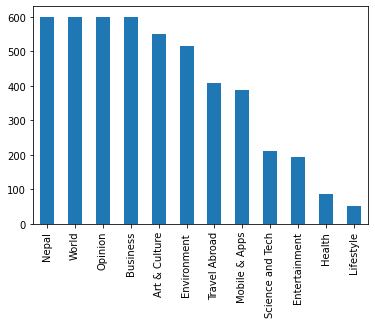

In [8]:
#plotting the value counts of category
data.location.value_counts().plot(kind='bar')

In [9]:
#checking for null values
data.isna().value_counts()

headline  body   location  time_published
False     False  False     False             4799
          True   False     False                1
dtype: int64

In [10]:
#dropping the null values
data.dropna(inplace=True)

In [11]:
#checking for null values
data.isna().value_counts()

headline  body   location  time_published
False     False  False     False             4799
dtype: int64

In [12]:
# combining the headline and body of the news
data['Text'] = data['headline'] + ' ' + data['body']

In [13]:
data['Text'].head()

0    Nepal records three COVID-19 cases on Wednesda...
1    UN Resident Coordinator Lisa Singh presents cr...
2    Six CAN board members boycott meeting Six exec...
3    Seven3Sports unilaterally terminates NepalT20 ...
4    Decision to free Sandeep on bail challenged in...
Name: Text, dtype: object

In [14]:
#convert to lower case
data['Text'] = data['Text'].apply(lambda x: x.lower())

In [15]:
#removing special characters but not full stop and numbers
data['Text'] = data['Text'].apply(lambda x: re.sub('[^a-zA-Z0-9.]', ' ', x))

In [16]:
#removing extra spaces
data['Text'] = data['Text'].apply(lambda x: re.sub(' +', ' ', x))

In [17]:
#removing hyperlinks
data['Text'] = data['Text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [18]:
#removing numbers
data['Text'] = data['Text'].apply(lambda x: re.sub(r'\d+', '', x))

In [19]:
#removing stop words
stop_words = set(stopwords.words('english'))
data['Text'] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [20]:
data['Text'].head()

0    nepal records three covid cases wednesday tota...
1    un resident coordinator lisa singh presents cr...
2    six board members boycott meeting six executiv...
3    sevensports unilaterally terminates nepalt con...
4    decision free sandeep bail challenged sc attor...
Name: Text, dtype: object

In [21]:
#lemmatization
nltk.download('omw-1.4')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
data['Text'] = data['Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ianus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ianus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
data['Text'].head()

0    nepal record three covid case wednesday total ...
1    un resident coordinator lisa singh present cre...
2    six board member boycott meeting six executive...
3    sevensports unilaterally terminates nepalt con...
4    decision free sandeep bail challenged sc attor...
Name: Text, dtype: object

In [23]:
#saving the data
data.to_csv('E:\Coderush\Scraping Assignment\scraping\preprocessedData.csv', index=False)

In [24]:
# visualizing the data
data['Text'].value_counts().plot(kind='bar')

<AxesSubplot:>

Error in callback <function flush_figures at 0x000001CA0A2C1090> (for post_execute):


KeyboardInterrupt: 

In [29]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.8.2.2-cp310-cp310-win_amd64.whl (153 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
#create a word cloud according to the frequency of words in each category
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests

Nepal


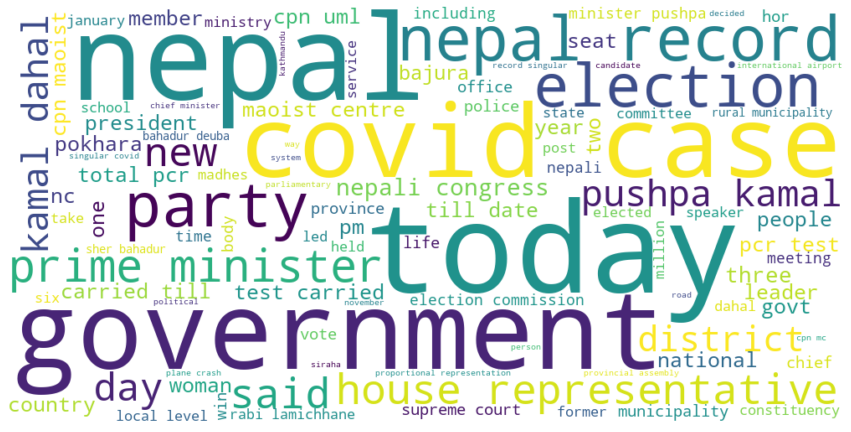

World


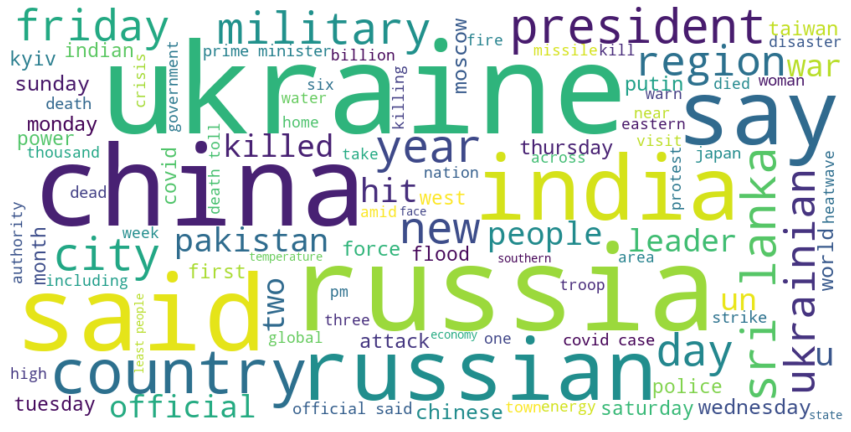

Opinion


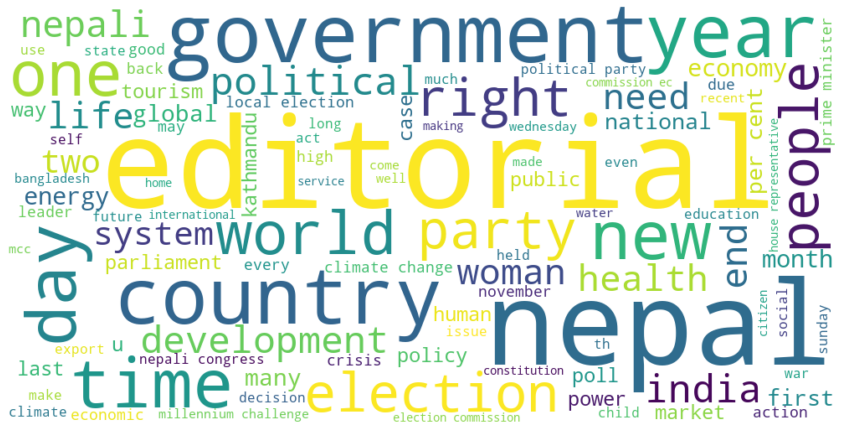

Business


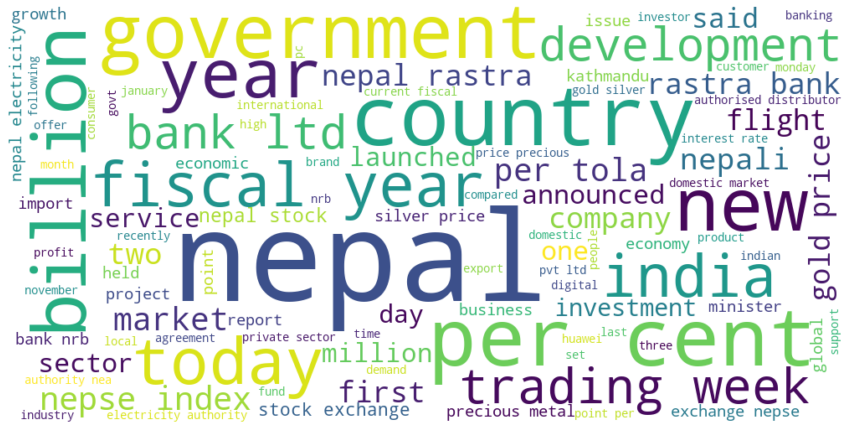

Entertainment


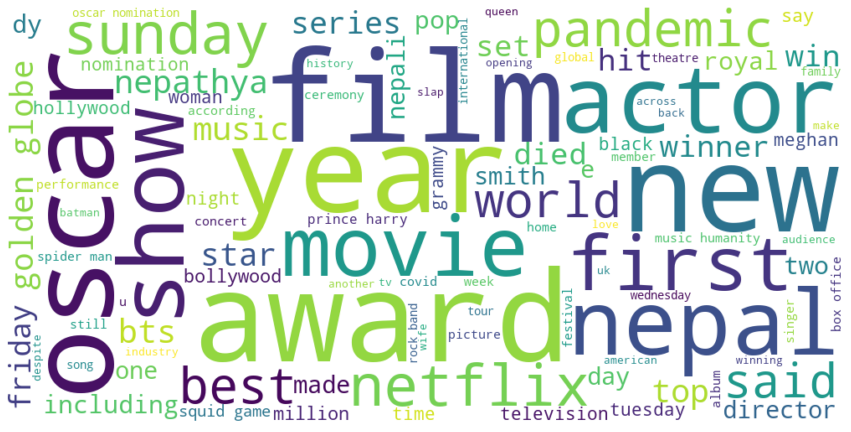

Travel Abroad


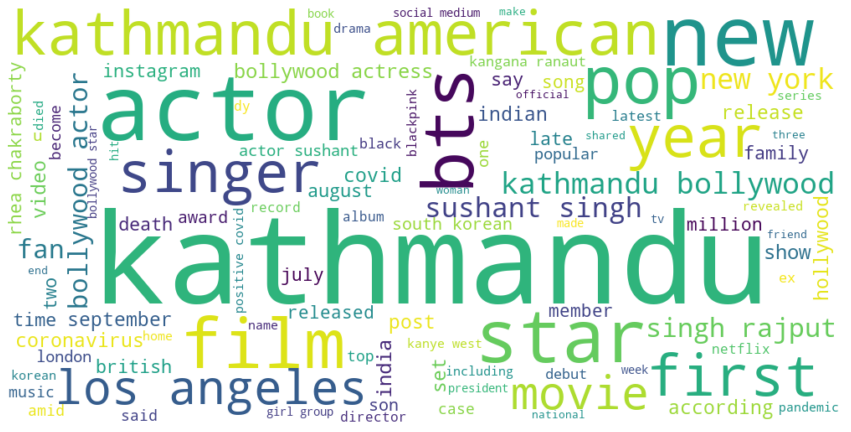

Lifestyle


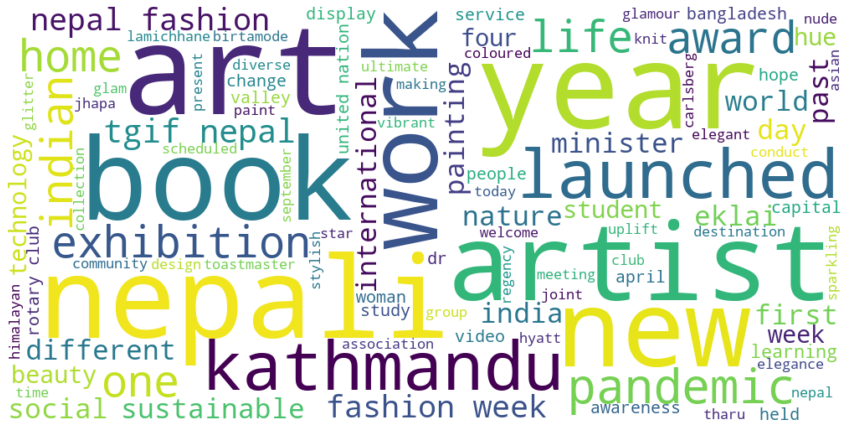

Art & Culture


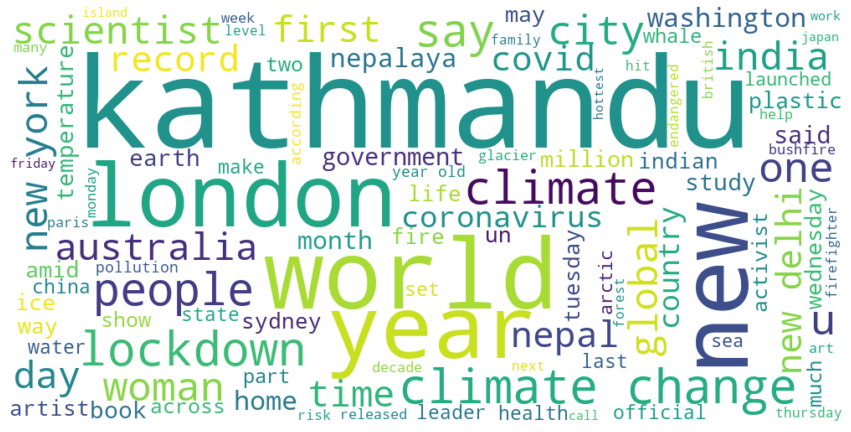

Science and Tech


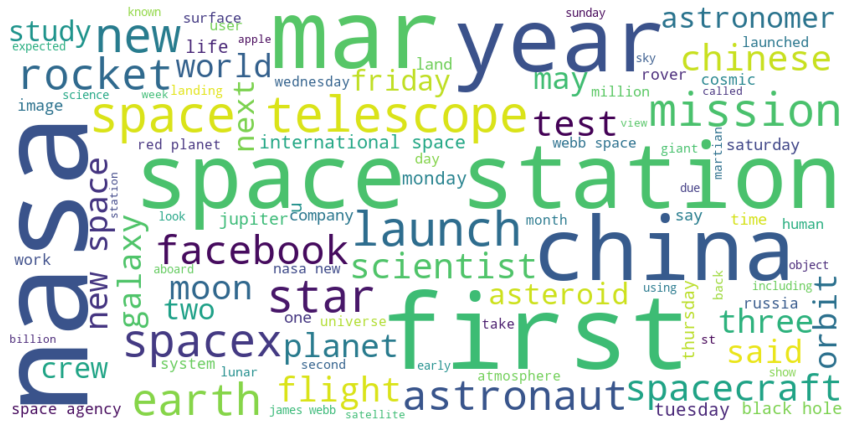

Mobile & Apps


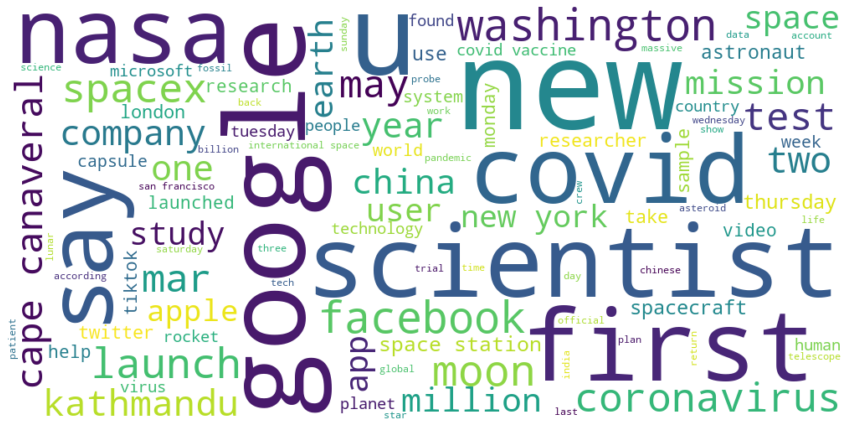

Health


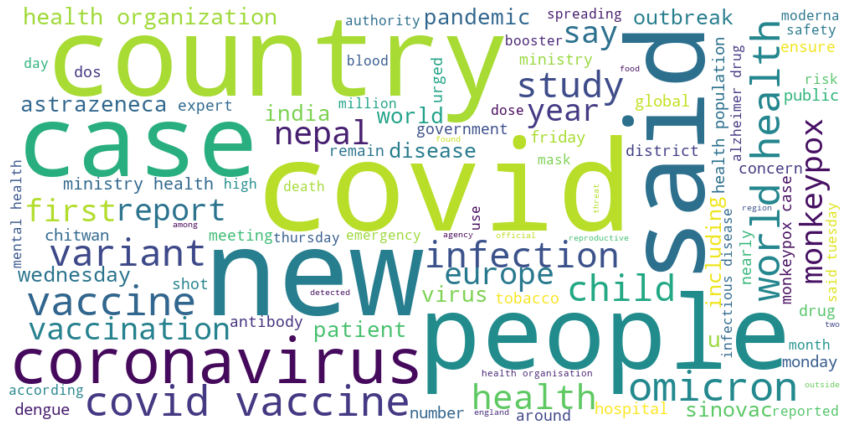

Environment 


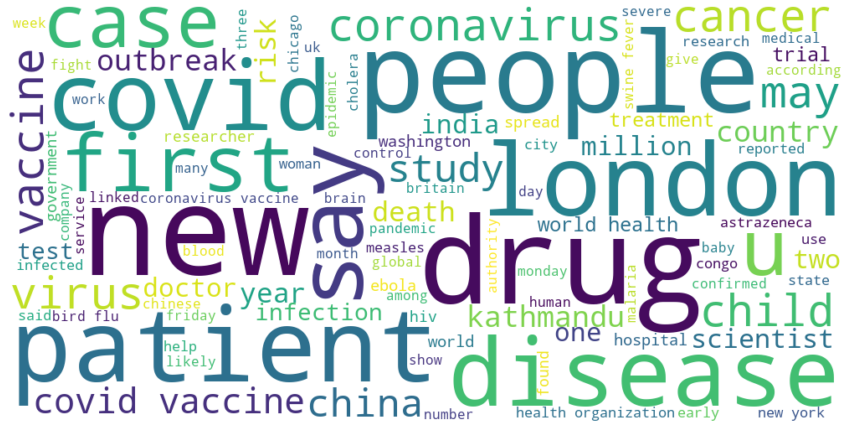

In [32]:

#creating a word cloud for each category
for i in data.location.unique():
    text = ' '.join(data[data.location == i].Text)
    wordcloud = WordCloud(width=1000, height=500, max_font_size=150, max_words=100, background_color="white").generate(text)
    print(i)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

<AxesSubplot:>

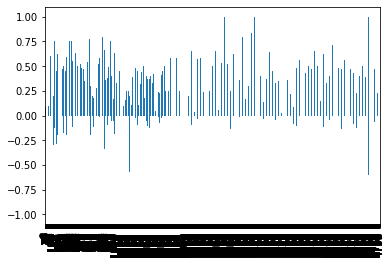

In [33]:
# find polarity and subjectivity of each news category 
from textblob import TextBlob
data['polarity'] = data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['subjectivity'] = data['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

Text(0.5, 0, 'News Category')

<Figure size 1440x720 with 0 Axes>

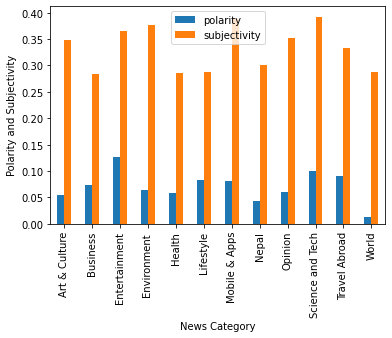

In [46]:
#find the average polarity and subjectivity of each category
data.groupby('location').mean()
plt.figure(figsize=(20,10))
data.groupby('location').mean().plot(kind='bar')
plt.ylabel('Polarity and Subjectivity')
plt.xlabel('News Category')


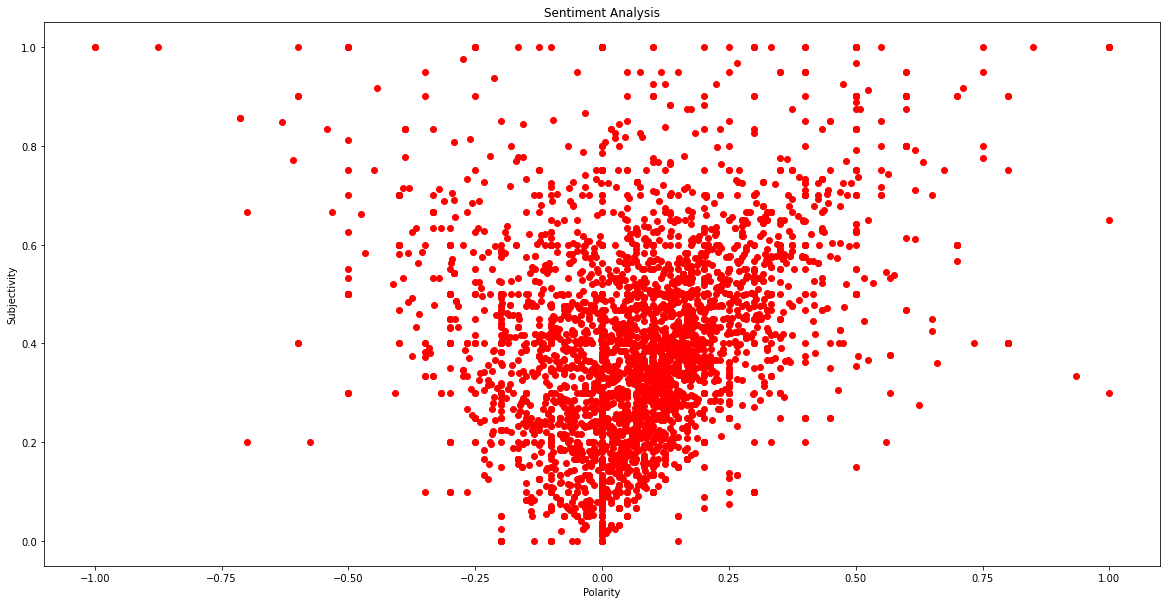

In [47]:
# scatter plot of polarity and subjectivity
plt.figure(figsize=(20,10))
plt.scatter(data['polarity'], data['subjectivity'], color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Text(0.5, 0, 'News Category')

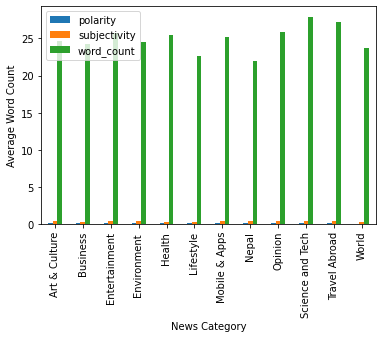

In [18]:
new = pd.read_csv('E:\Coderush\Scraping Assignment\scraping\preprocessedData.csv')

In [19]:
new.head()

headline  \
0    Nepal records three COVID-19 cases on Wednesday   
1  UN Resident Coordinator Lisa Singh presents cr...   
2              Six CAN board members boycott meeting   
3  Seven3Sports unilaterally terminates NepalT20 ...   
4  Decision to free Sandeep on bail challenged in SC   

                                                body location time_published  \
0  With this, a total of 6,003,944 PCR tests have...    Nepal        4 h ago   
1  United Nations Resident Coordinator Lisa Simri...    Nepal       10 h ago   
2  Six executive committee members of the Cricket...    Nepal       13 h ago   
3  The Seven3Sports has unilaterally terminated t...    Nepal       13 h ago   
4  The Attorney General’s Office has filed a peti...    Nepal       14 h ago   

                                                Text  
0  nepal record three covid case wednesday total ...  
1  un resident coordinator lisa singh present cre...  
2  six board member boycott meeting six executive...  
3  sevensports unilaterally terminates nepalt con...  
4  decision free sandeep bail challenged sc attor...

In [20]:
new.time_published.dtype

dtype('O')

In [22]:
#extract only the numerical value from the time_published column
new['time_published'] = new['time_published'].apply(lambda x: re.sub('[^0-9]', '', x))



In [23]:
new['time_published'].dtype

dtype('O')

In [24]:
#convert time_published to float
new['time_published'] = new['time_published'].astype(float)

In [25]:
new.time_published.head()

0     4.0
1    10.0
2    13.0
3    13.0
4    14.0
Name: time_published, dtype: float64

<AxesSubplot:>

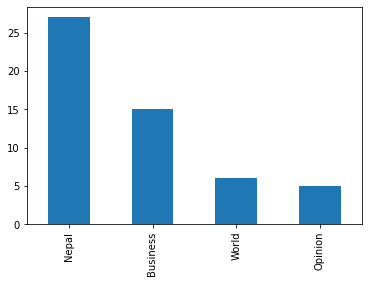

In [28]:
#print news published in last 24 hours accordint to location column and plot the value counts of each category in a bar graph
new[new.time_published < 24].location.value_counts().plot(kind='bar')


In [30]:
# change column location to category
new['category'] = new['location']
new.drop('location', axis=1, inplace=True)


In [33]:
# save csv of preprocessed data according to the category and save it in a folder
for i in new.category.unique():
    new[new.category == i].to_csv(f'E:\Coderush\Scraping Assignment\scraping\category\{i}.csv', index=False)




In [35]:
new.time_published.value_counts()

282022.0    84
272022.0    80
252022.0    79
302022.0    78
292022.0    75
            ..
12.0         1
5.0          1
3.0          1
16.0         1
282017.0     1
Name: time_published, Length: 223, dtype: int64